# **Part 3:Apply prescriptive analytic**

Run 1: Best found in Generation 6
       Individual: [3.54 5.   4.49 4.13]
       MSE: 1085892.86

Run 2: Best found in Generation 20
       Individual: [4.39 4.92 4.44 4.74]
       MSE: 1086746.89

Run 3: Best found in Generation 20
       Individual: [4.31 4.72 4.5  1.33]
       MSE: 1086844.62

Run 4: Best found in Generation 19
       Individual: [0.1  4.66 4.55 0.67]
       MSE: 1087281.35

Run 5: Best found in Generation 19
       Individual: [1.26 4.93 4.53 0.08]
       MSE: 1085922.08

Run 6: Best found in Generation 18
       Individual: [0.06 4.64 4.52 0.31]
       MSE: 1087128.94

Run 7: Best found in Generation 18
       Individual: [4.9  4.98 4.47 2.42]
       MSE: 1086019.62

Run 8: Best found in Generation 20
       Individual: [4.99 4.97 4.51 0.01]
       MSE: 1085715.94

Run 9: Best found in Generation 20
       Individual: [4.93 4.96 4.49 0.45]
       MSE: 1085829.57

Run 10: Best found in Generation 9
       Individual: [4.14 4.82 4.44 0.82]
       MSE: 1087302.99

=

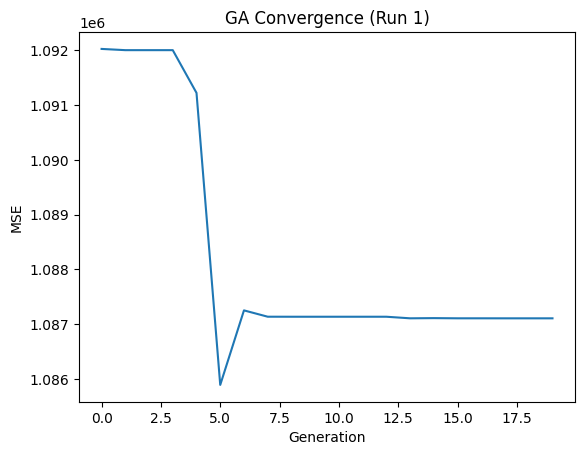

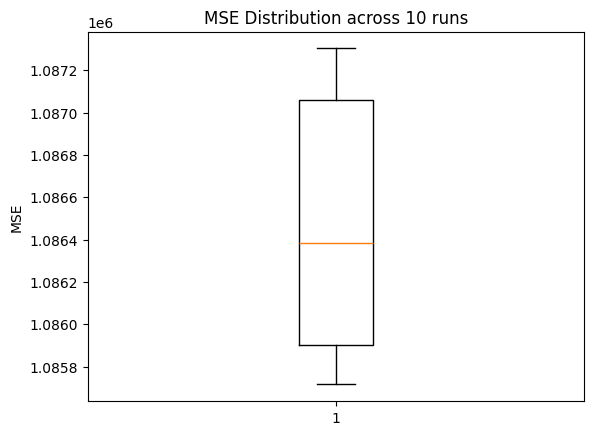

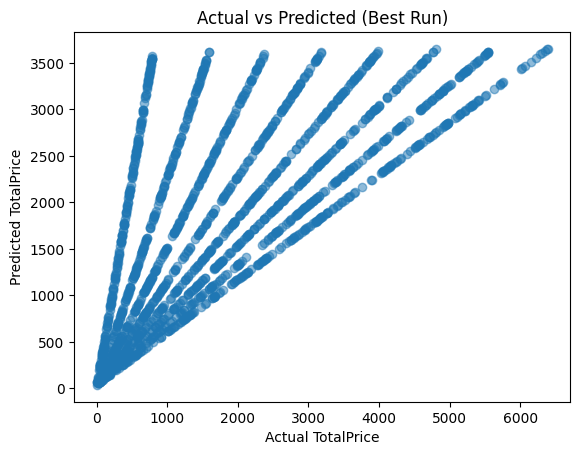

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("Customer-Purchase-History.csv")
X = df[["Quantity", "UnitPrice", "ReviewRating"]].values
y = df["TotalPrice"].values

# Genetic Algorithm Functions
def fitness(weights, X, y):
    W1, W2, W3, W4 = weights
    y_pred = W1 + W2*X[:,0] + W3*X[:,1] + W4*X[:,2]
    mse = np.mean((y - y_pred)**2)
    return -mse  # maximize fitness, so negative MSE

def init_population(size):
    return np.random.uniform(0, 5, (size, 4)) 
                        #start num, finish num, population size

def selection(pop, scores, k=3):
    selected = []
    for _ in range(len(pop)):
        idx = np.random.randint(len(pop), size=k)
        selected.append(pop[idx[np.argmax(scores[idx])]])
    return np.array(selected) 

def crossover(p1, p2, rate=0.7):
    if np.random.rand() < rate:
        point = np.random.randint(1, len(p1))
        return np.concatenate((p1[:point], p2[point:])), np.concatenate((p2[:point], p1[point:]))
    return p1, p2

def mutation(child, rate=0.1):
    for i in range(len(child)):
        if np.random.rand() < rate:
            child[i] = np.random.uniform(0, 5)
    return child

# Run GA Optimization
def run_ga(n_generations=20, pop_size=40): 
    pop = init_population(pop_size)
    best_scores = []
    best_individual = None
    best_fitness = -np.inf
    best_generation = 0

    for gen in range(n_generations):
        scores = np.array([fitness(ind, X, y) for ind in pop])
        best_scores.append(-scores.max())

        if scores.max() > best_fitness:
            best_fitness = scores.max()
            best_individual = pop[np.argmax(scores)]
            best_generation = gen + 1

        selected = selection(pop, scores)
        children = []
        for i in range(0, pop_size, 2):
            p1, p2 = selected[i], selected[i+1]
            c1, c2 = crossover(p1, p2)
            children.append(mutation(c1))
            children.append(mutation(c2))
        pop = np.array(children)

    mse = -best_fitness
    return best_individual, mse, best_generation, best_scores

# Multiple Runs (10)
results = []
convergences = []
for run in range(10):
    best_weights, best_mse, best_gen, best_scores = run_ga(n_generations=20, pop_size=30)
    results.append((best_weights, best_mse, best_gen, run+1))
    convergences.append(best_scores)
    print(f"Run {run+1}: Best found in Generation {best_gen}")
    print(f"       Individual: {np.round(best_weights,2)}")
    print(f"       MSE: {best_mse:.2f}\n")

# Pick best overall
best_overall = min(results, key=lambda x: x[1])
bw, bmse, bgen, brun = best_overall
print("===== Best Overall Result =====")
print(f"Run {brun}, Generation {bgen}")
print(f"Individual: {np.round(bw,2)}")
print(f"MSE: {bmse:.2f}")


# Visualization
# Plot convergence of first run
plt.plot(convergences[0])
plt.xlabel("Generation")
plt.ylabel("MSE")
plt.title("GA Convergence (Run 1)")
plt.show()

# Boxplot of MSE across runs
mse_values = [mse for _, mse, _, _ in results]
plt.boxplot(mse_values)
plt.title("MSE Distribution across 10 runs")
plt.ylabel("MSE")
plt.show()

# Actual vs Predicted for best run
y_pred = bw[0] + bw[1]*X[:,0] + bw[2]*X[:,1] + bw[3]*X[:,2]
plt.scatter(y, y_pred, alpha=0.5)
plt.xlabel("Actual TotalPrice")
plt.ylabel("Predicted TotalPrice")
plt.title("Actual vs Predicted (Best Run)")
plt.show()
